# Suicide Rate Prediction

In [1]:
#Importing libraries and packages for our machine learning project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from math import sqrt
from sklearn.model_selection import cross_val_score

In [2]:
#This is to ignore warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#This imports your dataset
data = pd.read_csv("master.csv")

In [4]:
#This shows the last (five) entries of the data set
data.tail(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [5]:
#This is to view the type of data in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


This shows that there are 27820 instances or entries in our data set belonging to twelve (12) attributes or features

From the data, we can see that four (4) features are made of numbers which are integers and 2 features are made up of numbers with decimals and also 6 other features made up of objects.
The data information also shows that all features are not null and contains inputs. However, when it comes to the HDI for year, it is shown that only 8364 are filled, meaning we will be dealing with some missing data later on.

In [6]:
#This is to show the twelve (12) features of the data 
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [392]:
#This is to rename the columns 
data = data.rename(columns = {" gdp_for_year ($) " : "GDPforYear($)", "gdp_per_capita ($)": "GDPperCapita($)", "suicides/100k pop": "suicide_rate_100k"})
data.head(2)

,country,year,sex,age,suicides_no,population,suicide_rate_100k,country-year,HDI for year,GDPforYear($),GDPperCapita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


When we checked the data information above, we found out that the GDP per year feature registered it's entries as objects because of how the data was entered. We have to change in to numeric values.

In [393]:
#This converts GDP for year from object to numeric values
data['GDPforYear($)'] = data['GDPforYear($)'].apply(lambda x:x.replace(',', '')).astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicide_rate_100k    27820 non-null float64
country-year         27820 non-null object
HDI for year         8364 non-null float64
GDPforYear($)        27820 non-null int64
GDPperCapita($)      27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


The entries for GDP for year is now recognised as integers

In [394]:
#A feature will be dropped because it has no significance or affects nothing in out dataset
data = data.drop("country-year", axis = 1)

In [395]:
#This is to show how thw dataset looks without the feature that was dropped
data.head(2)

,country,year,sex,age,suicides_no,population,suicide_rate_100k,HDI for year,GDPforYear($),GDPperCapita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,2156624900,796,Silent


We are now going to deal with the data that is missing in the dataset (HDI for year)

In [396]:
#This is to show how many entries are null in the dataset and sum it for the total numbwe
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicide_rate_100k        0
HDI for year         19456
GDPforYear($)            0
GDPperCapita($)          0
generation               0
dtype: int64

In [397]:
missingHDI = data["HDI for year"].isnull().sum()
missingHDI

19456

In [398]:
#saving the data under HDI 
HDI_data = data["HDI for year"]

In [399]:
HDI_data.sample(5)

18369      NaN
13694    0.888
19749      NaN
19288    0.829
20589      NaN
Name: HDI for year, dtype: float64

We see that 19456 entries in the dataset is empty or missing, this will help decide if we are dropping the feature or we are going to fill it with averages to help with out project.

In [400]:
length = len(data) #this gives the number of entries of the dataset 
pmv = round((missingHDI/length) * 100)
print("Percentage of missing values for HDI per year:",  pmv, "%")

Percentage of missing values for HDI per year: 70.0 %


Dropping the HDI per year column since about 70% of the data is missing. Imputing it will not give a clear represntation of the data and might make it baised.

In [401]:
data = data.drop(["HDI for year"], axis = 1)

We will now be sorting the dataset according to years

In [402]:
data = data.sort_values("year")
data.head(10) 

,country,year,sex,age,suicides_no,population,suicide_rate_100k,GDPforYear($),GDPperCapita($),generation
21632,Saint Vincent and Grenadines,1985,male,35-54 years,2,6100,32.79,145641704,1622,Silent
21637,Saint Vincent and Grenadines,1985,female,55-74 years,0,4100,0.00,145641704,1622,G.I. Generation
21638,Saint Vincent and Grenadines,1985,female,75+ years,0,1000,0.00,145641704,1622,G.I. Generation
21639,Saint Vincent and Grenadines,1985,male,15-24 years,0,12100,0.00,145641704,1622,Generation X
21640,Saint Vincent and Grenadines,1985,male,25-34 years,0,9300,0.00,145641704,1622,Boomers
21641,Saint Vincent and Grenadines,1985,male,5-14 years,0,12800,0.00,145641704,1622,Generation X
21642,Saint Vincent and Grenadines,1985,male,55-74 years,0,2900,0.00,145641704,1622,G.I. Generation
21643,Saint Vincent and Grenadines,1985,male,75+ years,0,700,0.00,145641704,1622,G.I. Generation
22184,Seychelles,1985,male,35-54 years,3,4400,68.18,168887539,2947,Silent
22185,Seychelles,1985,male,15-24 years,3,7700,38.96,168887539,2947,Generation X


In [403]:
years = pd.unique(data["year"])
len(years)

32

This shows us that this data was collected within the span of 32 years for all the countries. This is the average maximum and minimum for the total countries, however some countries don't have their data for 32 years.

In [404]:
#This is to list the countries and further group them into continents after.
countries = pd.unique(data["country"])
print("number of countries:", len(countries))

number of countries: 101


In [405]:
countries

array(['Saint Vincent and Grenadines', 'Seychelles', 'Singapore',
       'Greece', 'France', 'Austria', 'Dominica', 'Spain', 'Sri Lanka',
       'Ecuador', 'Grenada', 'Ireland', 'Portugal', 'Argentina', 'Italy',
       'Israel', 'Puerto Rico', 'Republic of Korea', 'Iceland',
       'Costa Rica', 'Belgium', 'Barbados', 'Bahrain',
       'Trinidad and Tobago', 'Australia', 'United Kingdom',
       'United States', 'Bahamas', 'Brazil', 'Uruguay', 'Colombia',
       'Chile', 'Suriname', 'Bulgaria', 'Thailand', 'Canada',
       'Antigua and Barbuda', 'Malta', 'Kuwait', 'Jamaica', 'Panama',
       'Paraguay', 'Japan', 'New Zealand', 'Mauritius', 'Mexico',
       'Luxembourg', 'Netherlands', 'Norway', 'Belize', 'Saint Lucia',
       'Guatemala', 'Turkmenistan', 'Ukraine', 'Finland', 'Sweden',
       'Albania', 'Guyana', 'Russian Federation', 'Romania', 'Germany',
       'Poland', 'Uzbekistan', 'Georgia', 'Kyrgyzstan', 'Czech Republic',
       'Azerbaijan', 'Belarus', 'Saint Kitts and Nevis', 

In [406]:
Counter(data["country"]).most_common()[:10]

[('Austria', 382),
 ('Iceland', 382),
 ('Mauritius', 382),
 ('Netherlands', 382),
 ('Singapore', 372),
 ('Greece', 372),
 ('Spain', 372),
 ('Ecuador', 372),
 ('Argentina', 372),
 ('Italy', 372)]

In [407]:
Counter(data["country"]).most_common()[-10:]

[('United Arab Emirates', 72),
 ('Nicaragua', 72),
 ('Saint Kitts and Nevis', 36),
 ('San Marino', 36),
 ('Oman', 36),
 ('Bosnia and Herzegovina', 24),
 ('Dominica', 12),
 ('Macau', 12),
 ('Cabo Verde', 12),
 ('Mongolia', 10)]

The average suicides per 100k population is 12.82 with the minimum per 100k population being 0.0 and maximum being 224.97

# Data Visualisation

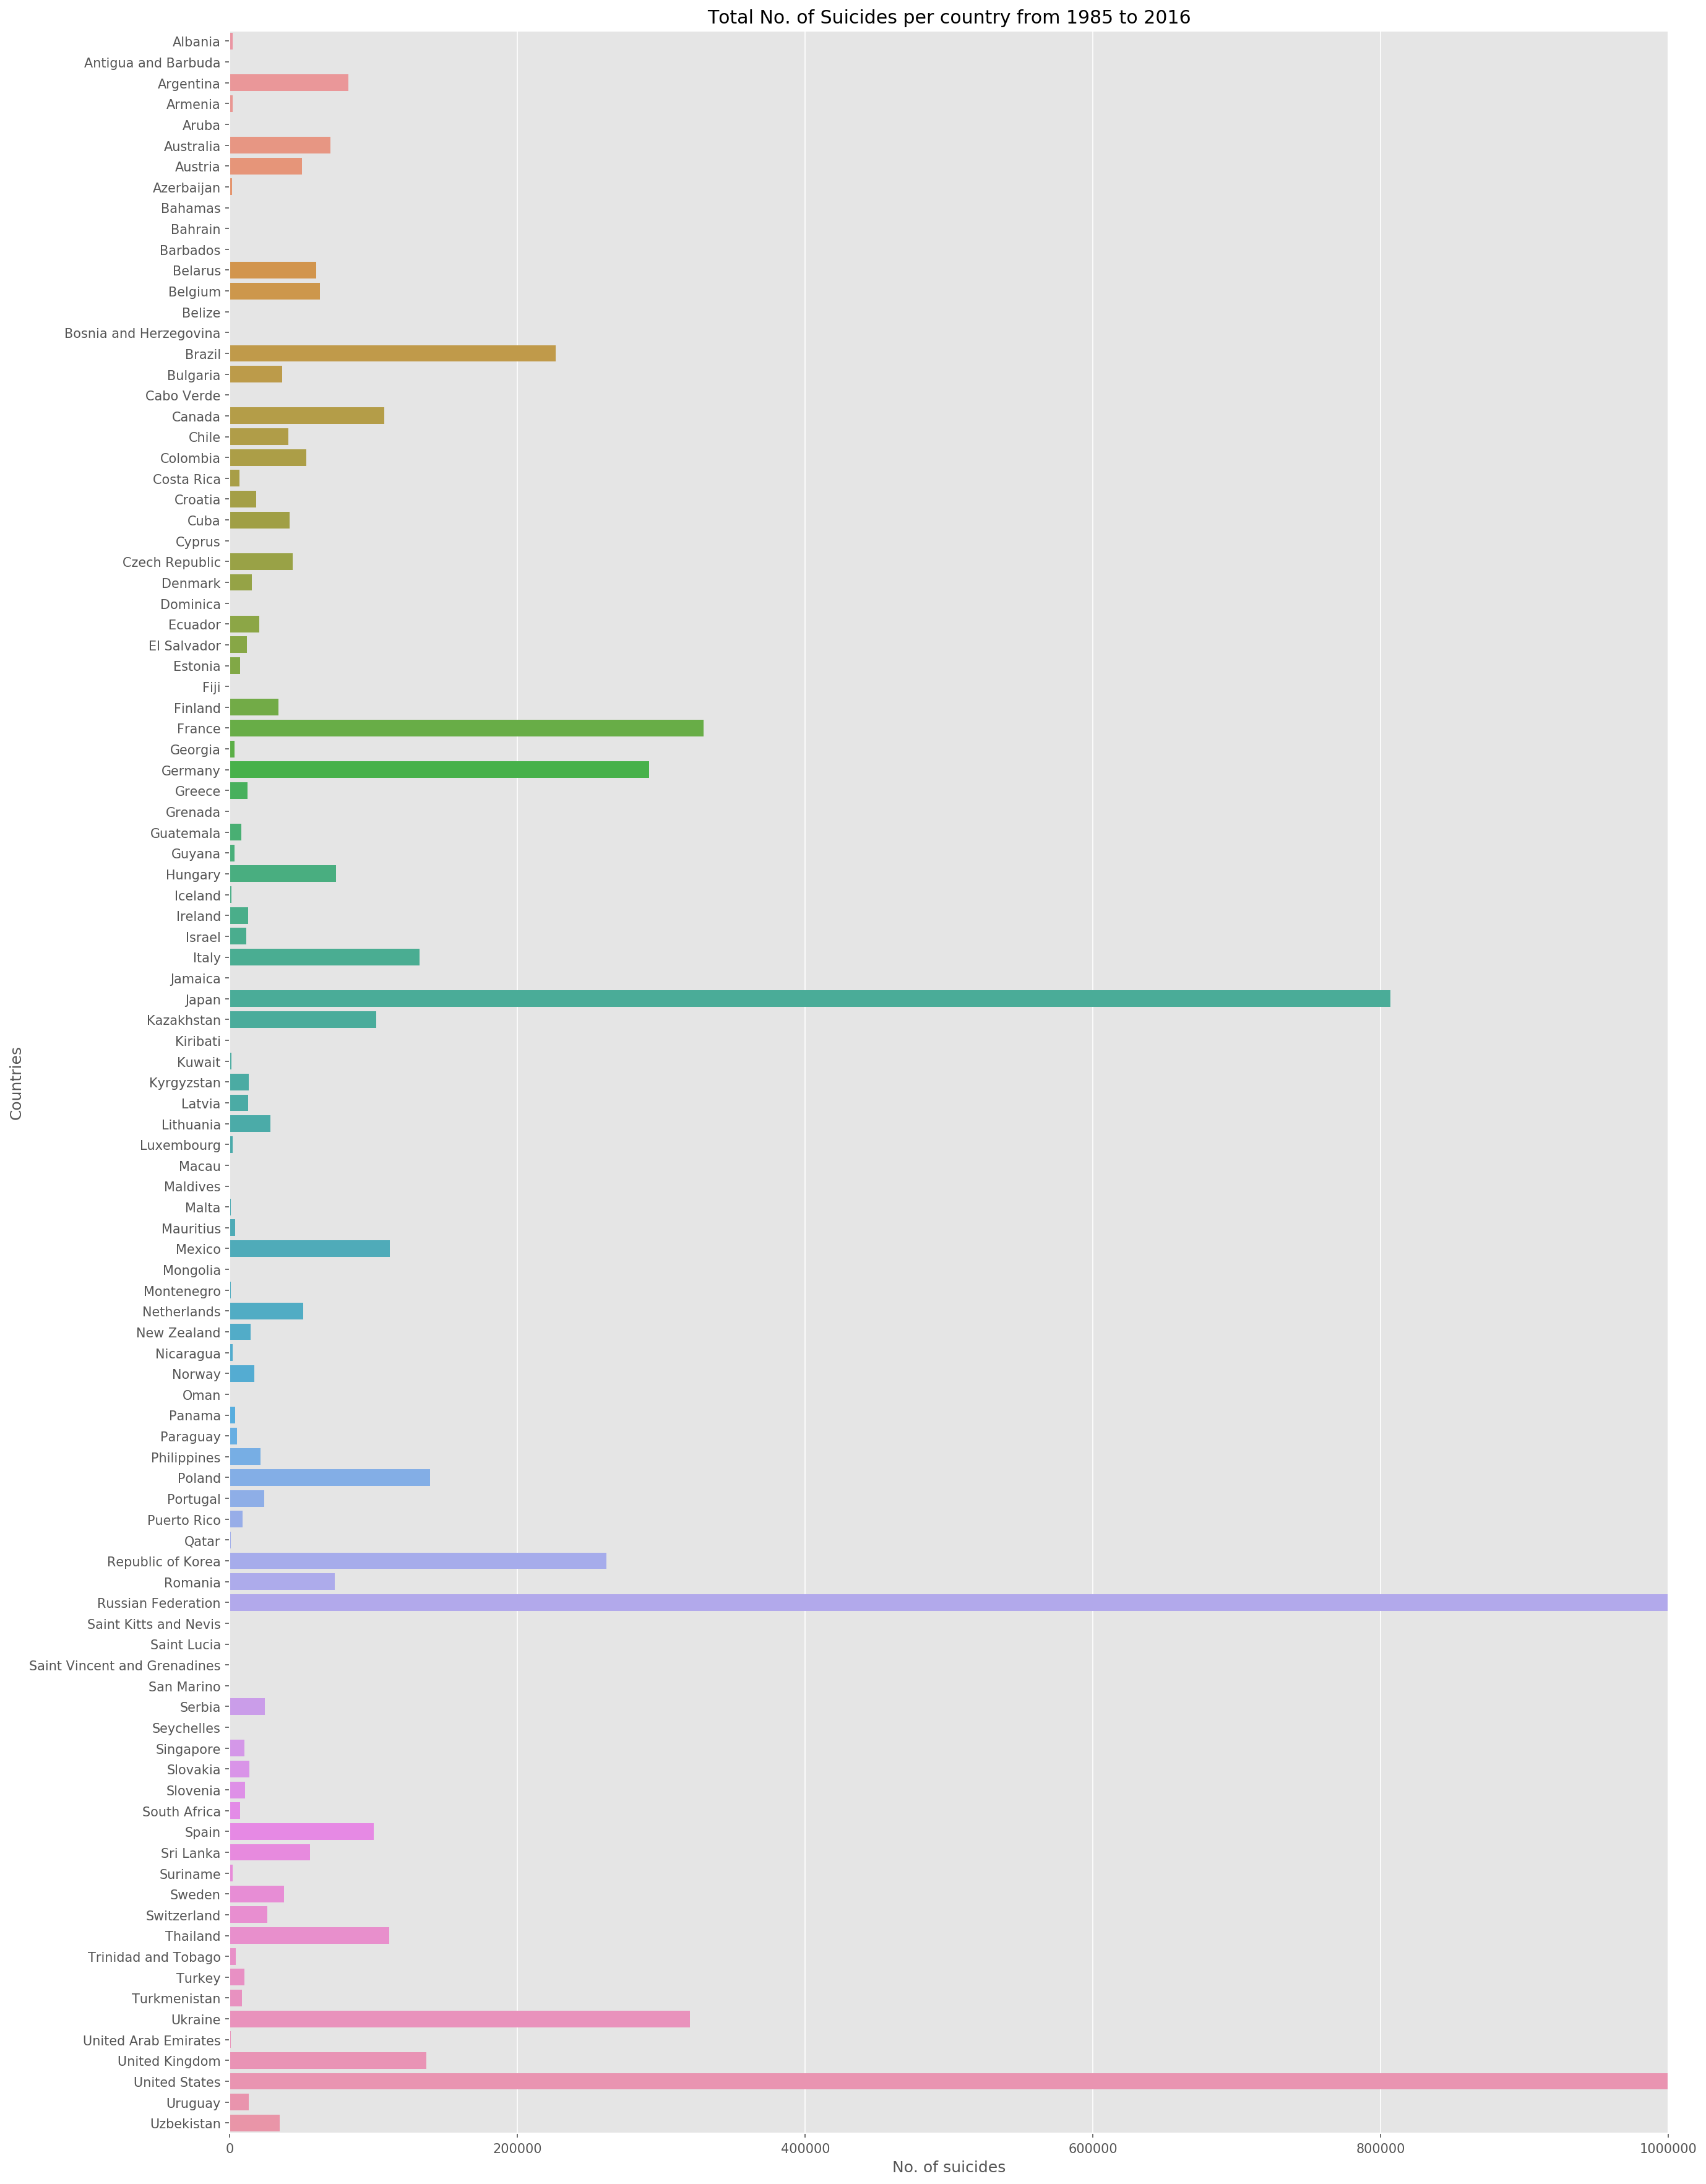

In [408]:
# Bar Plot No. of Suicides per country last 30 years.

# Main Var. for Ploting
suicides_no = data.groupby(['country']).suicides_no.sum()
countries = []
for (i, m) in data.groupby('country'):
    countries.append(i)
countries = np.array(countries);

# ploting
plt.figure(figsize=(20,30))
sns.barplot(y=countries, x=suicides_no)
plt.xlabel('No. of suicides')
plt.ylabel('Countries')
plt.title('Total No. of Suicides per country from 1985 to 2016')
plt.xlim(0, 1e6)
plt.show()

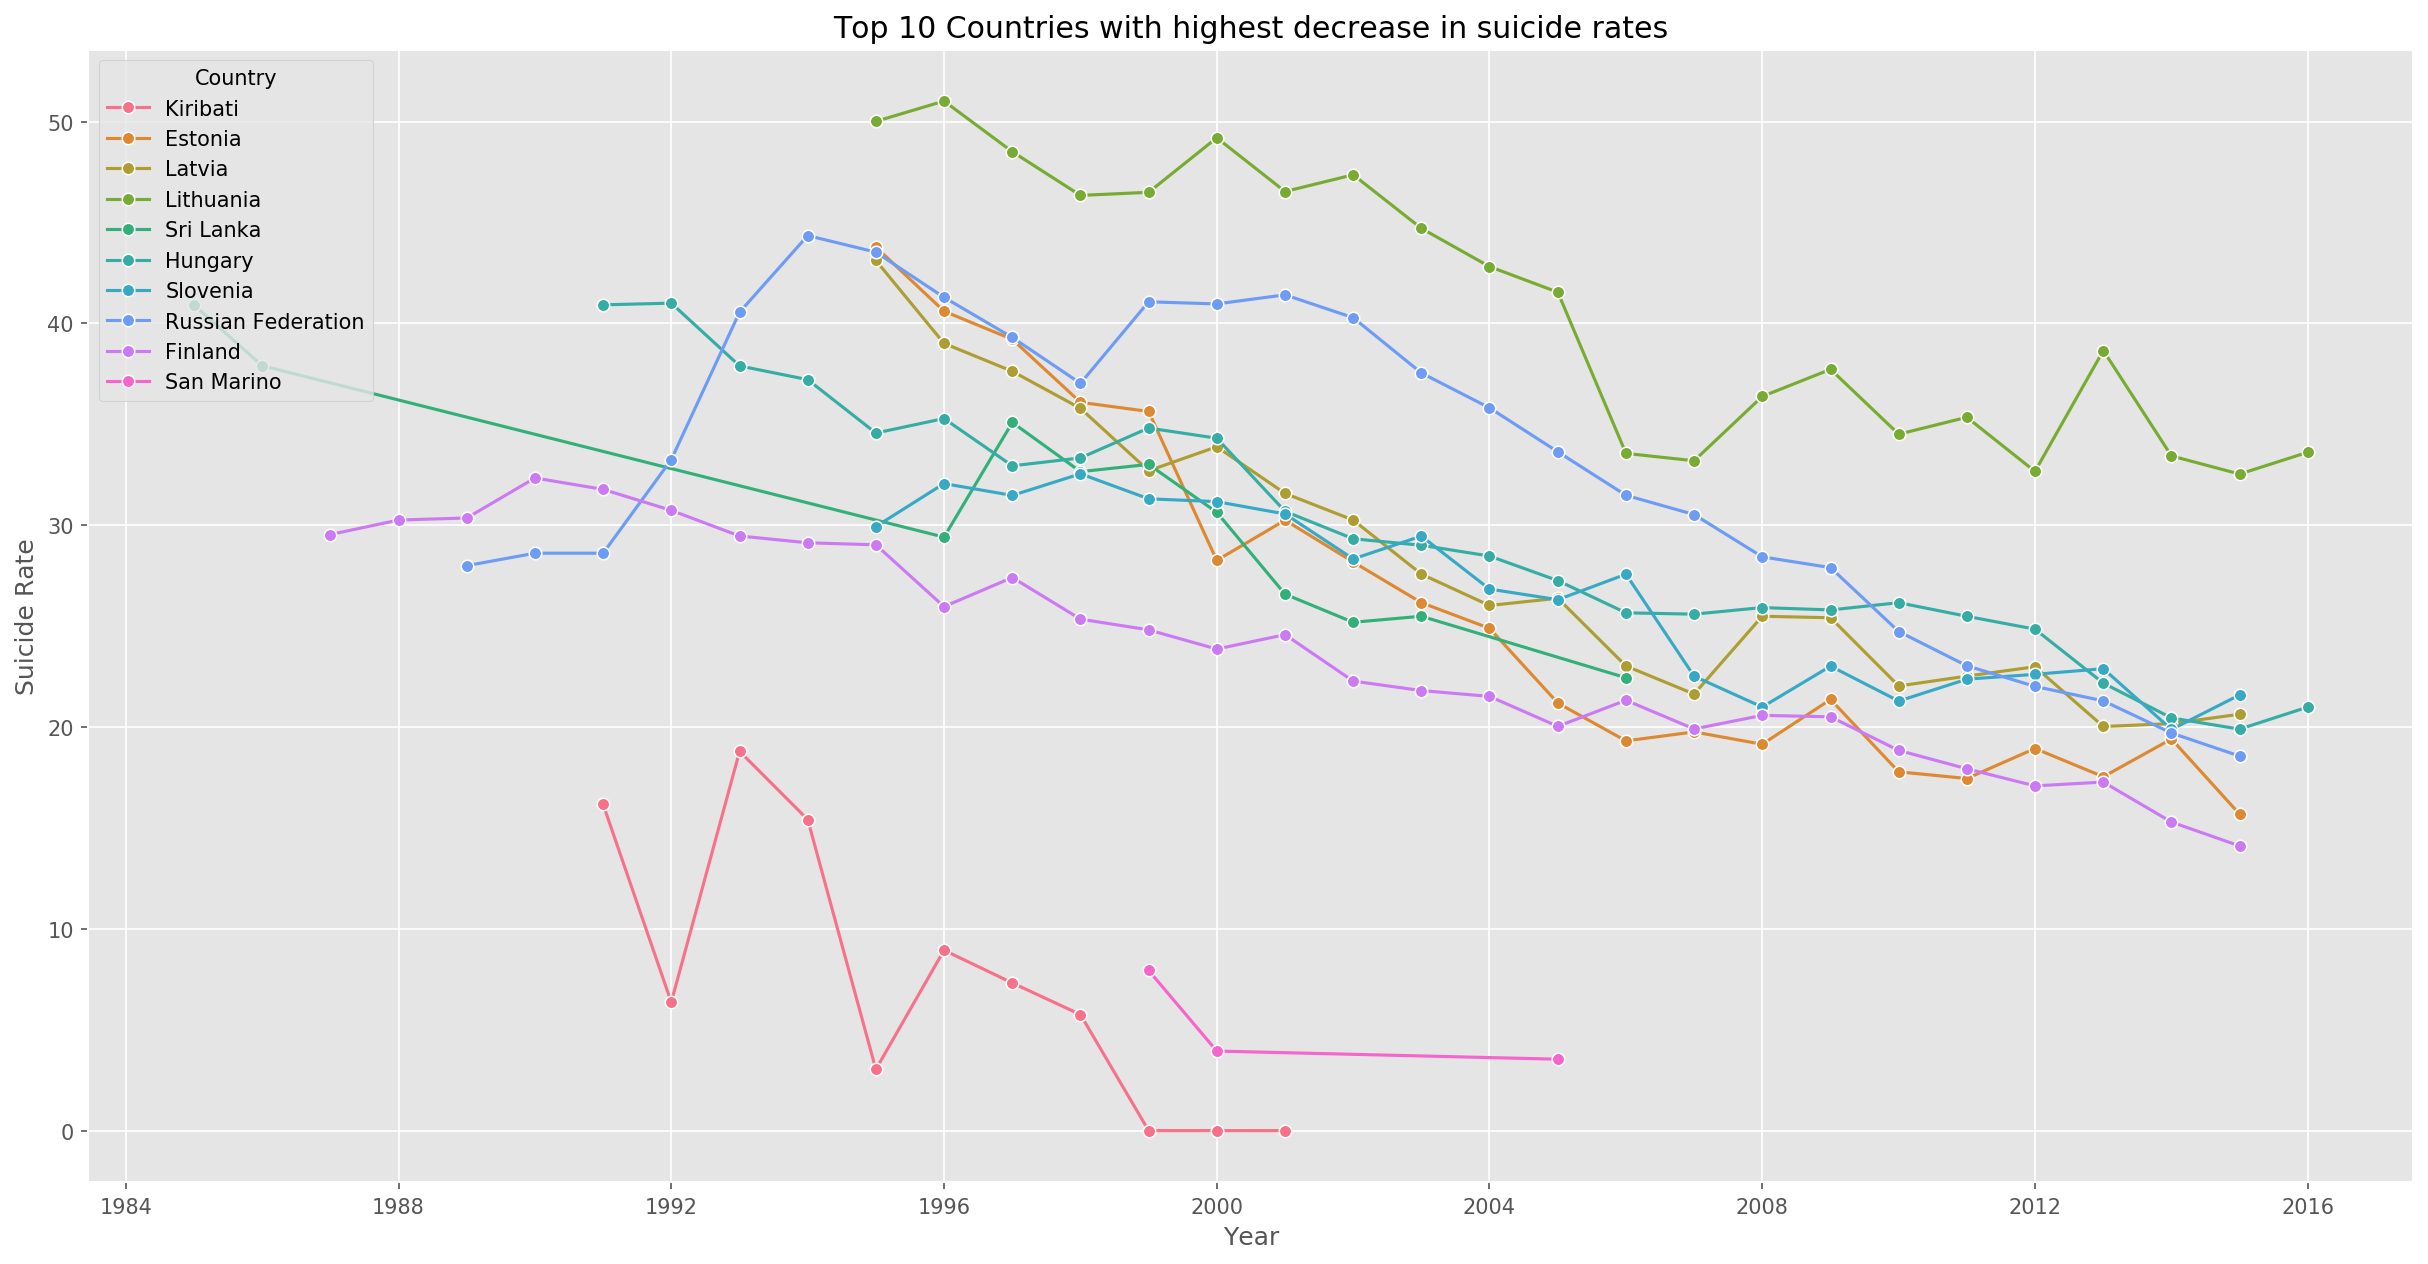

In [409]:
plt.figure(figsize=(20,10))
leg = []
sns.set_palette("husl", 10)
for country in decrease:
    dm_country = dm[dm['country'] == country]
    ax = sns.lineplot(x="year", y="suicide_rate",data=dm_country, marker='o')
    leg.append(country)

plt.legend(title='Country', loc='upper left', labels=leg)
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Top 10 Countries with highest decrease in suicide rates')
plt.show()

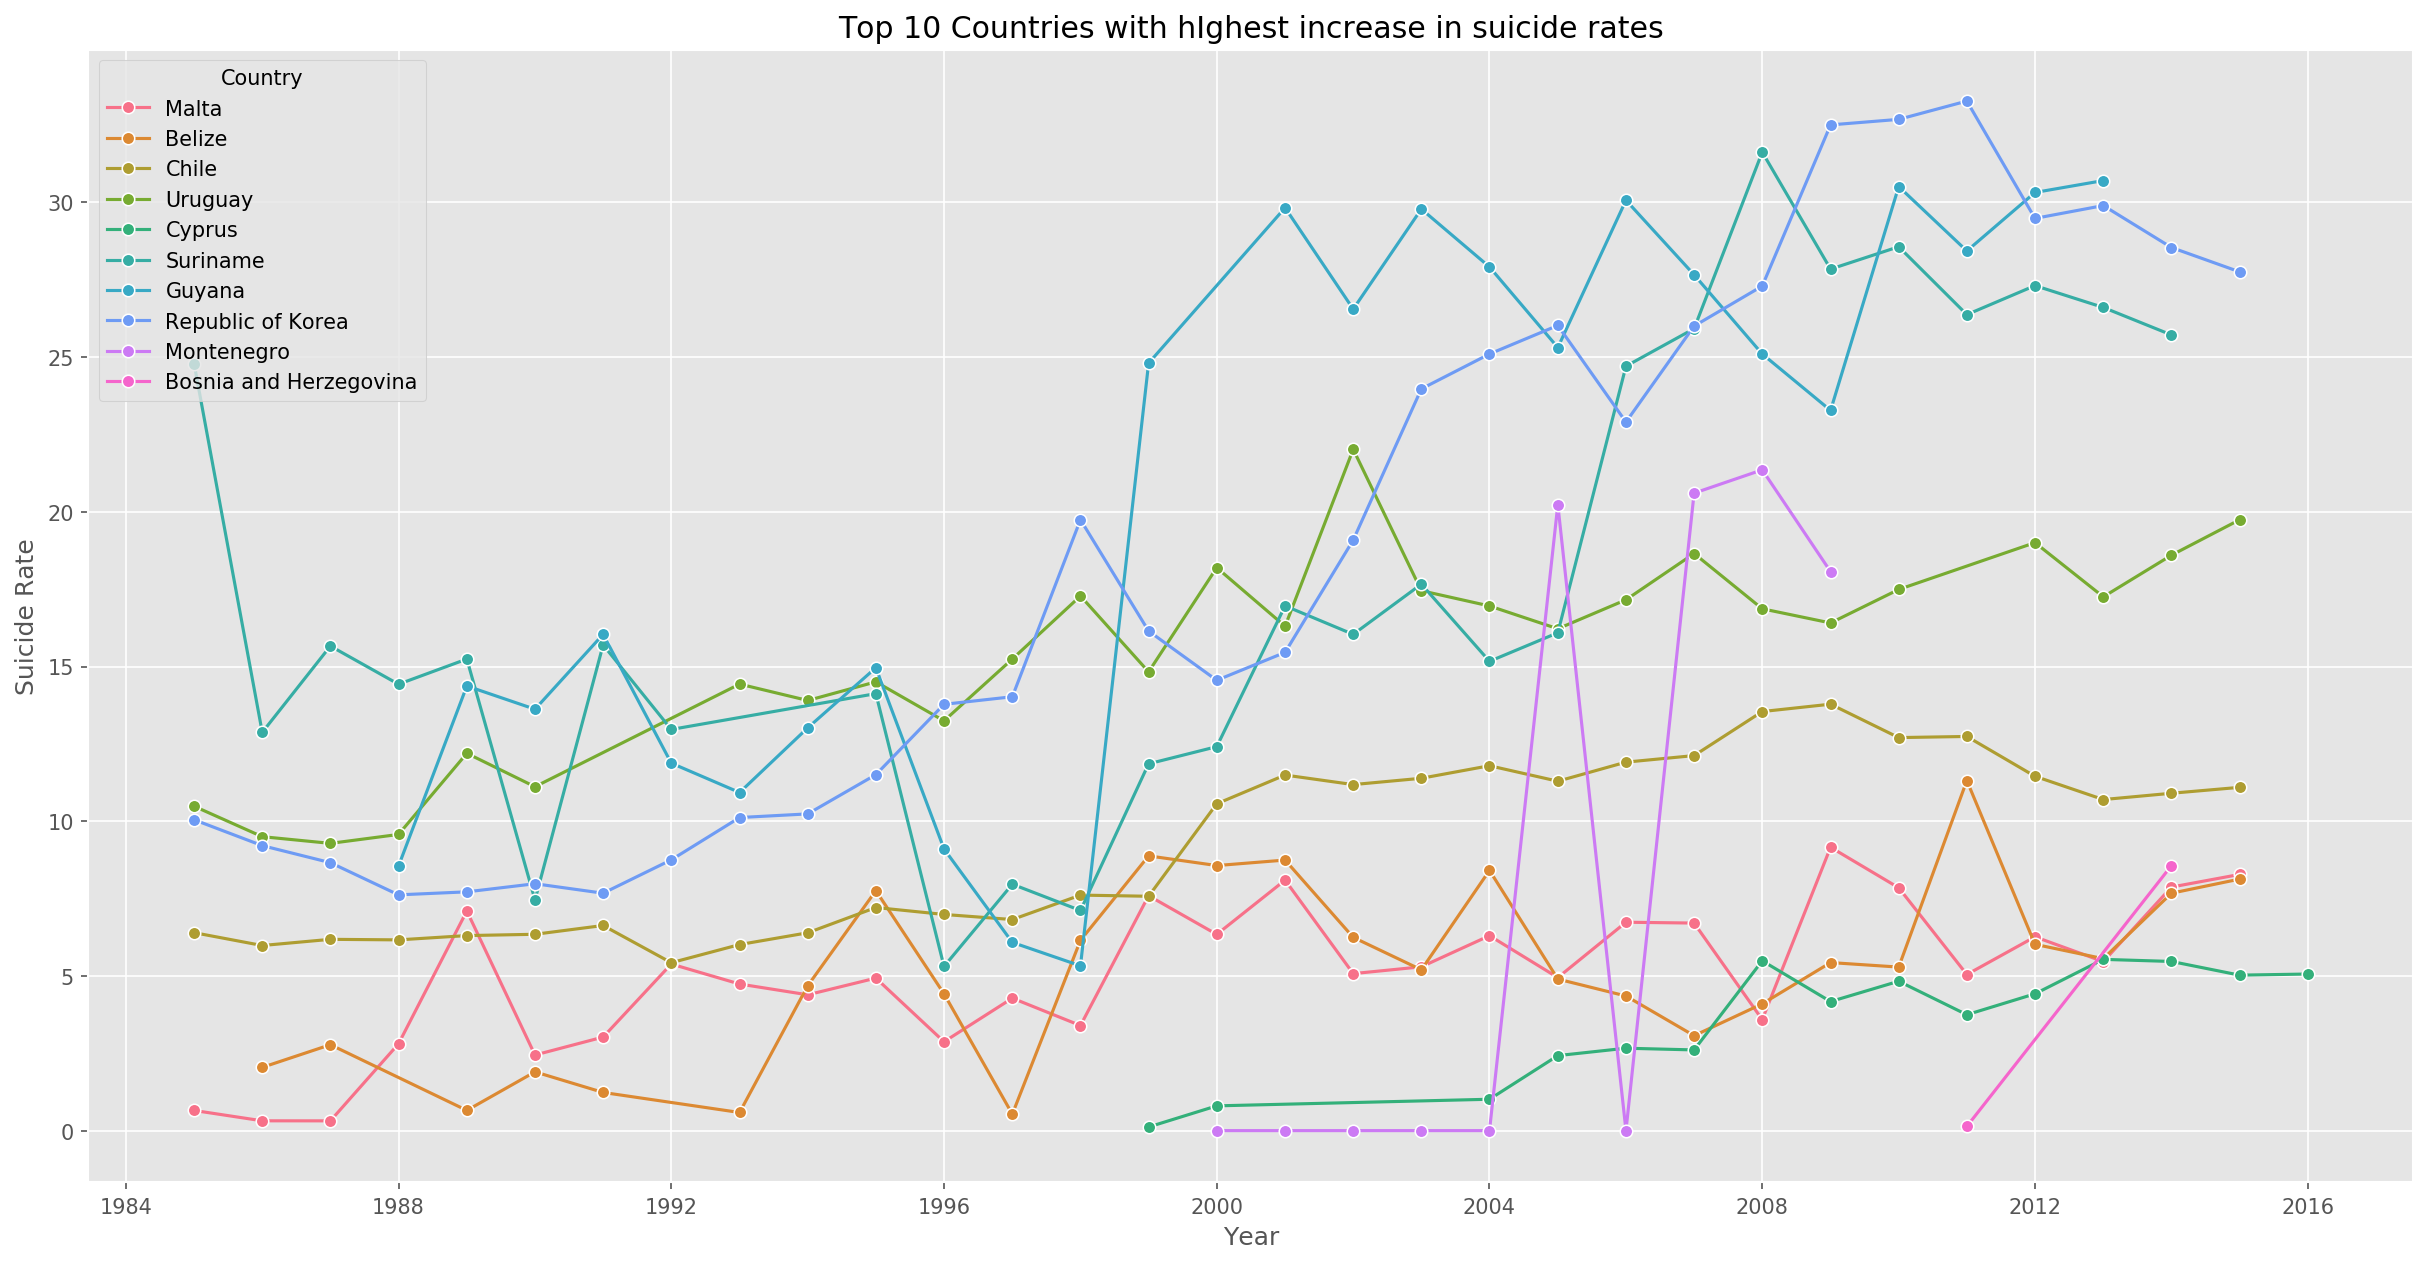

In [410]:
plt.figure(figsize=(20,10))
leg = []
sns.set_palette("husl", 10)
for country in increase:
    dm_country = dm[dm['country'] == country]
    ax = sns.lineplot(x="year", y="suicide_rate",data=dm_country, marker='o')
    leg.append(country)

plt.legend(title='Country', loc='best', labels=leg)
ax.set(ylabel='Suicide Rate', xlabel='Year', title = 'Top 10 Countries with hIghest increase in suicide rates')
plt.show()

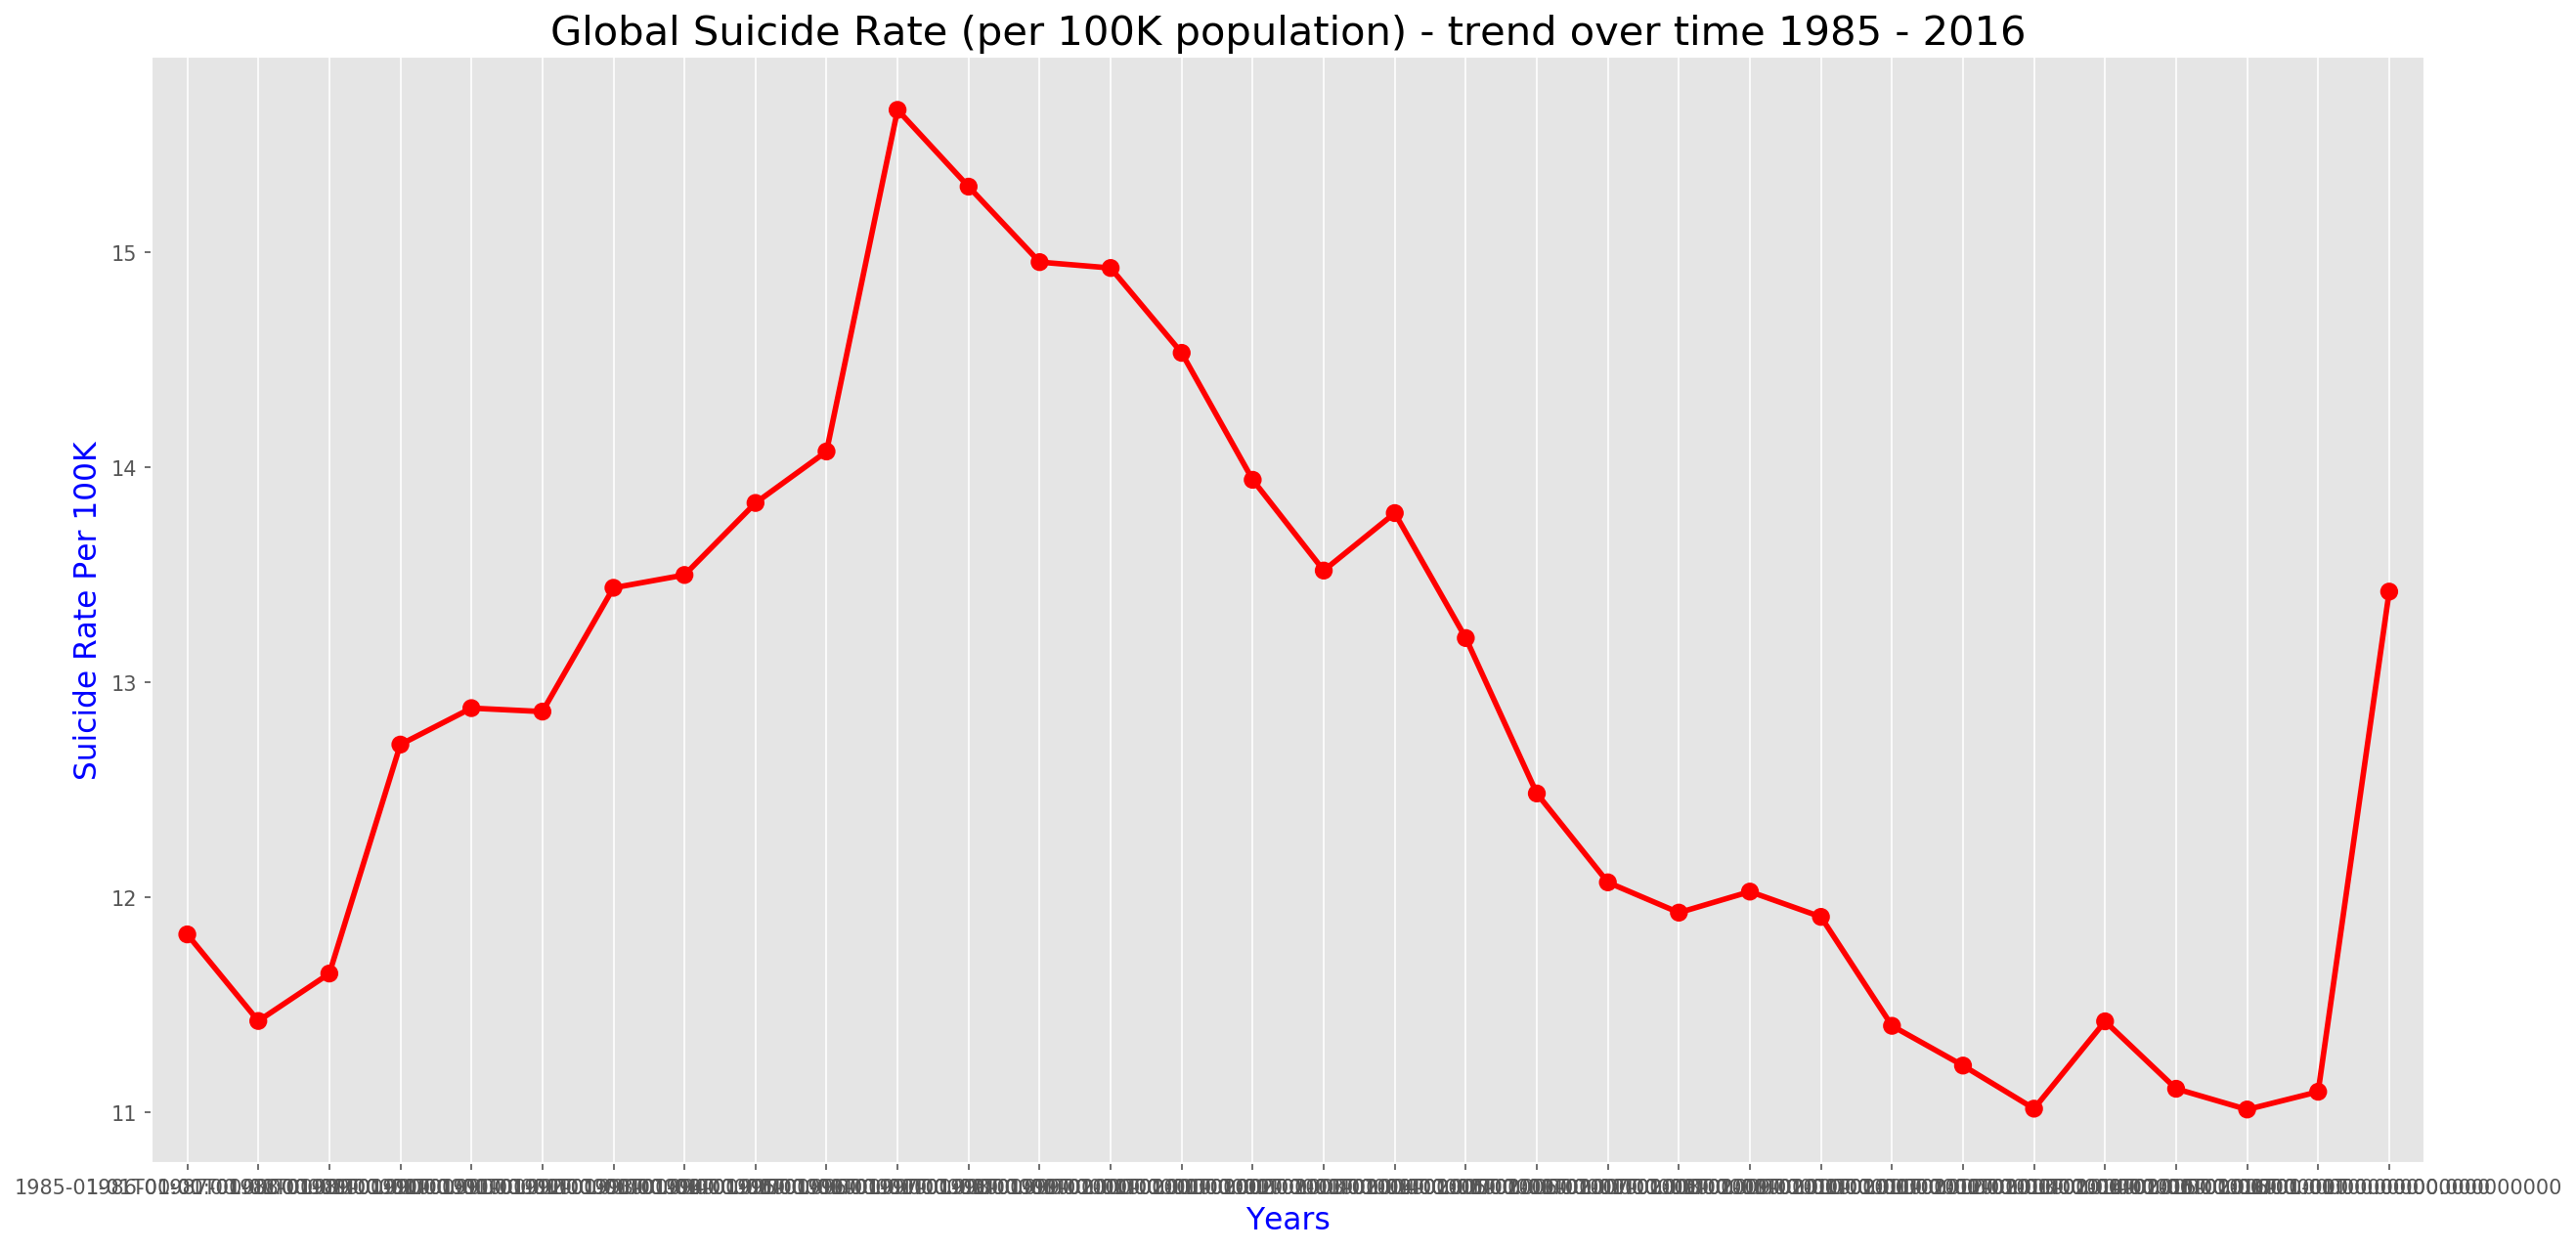

In [418]:
f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = data.groupby('year')['suicide_rate_100k'].mean().index, y = data.groupby('year')['suicide_rate_100k'].mean().values,data = data, color = 'red', alpha = 0.8)
plt.xlabel('Years', fontsize = 15,color='blue')
plt.ylabel('Suicide Rate Per 100K', fontsize = 15, color = 'blue')
plt.title('Global Suicide Rate (per 100K population) - trend over time 1985 - 2016', fontsize = 20, color = 'black')
plt.grid()

In [419]:
data["year"] = pd.to_datetime(data["year"], format = "%Y")

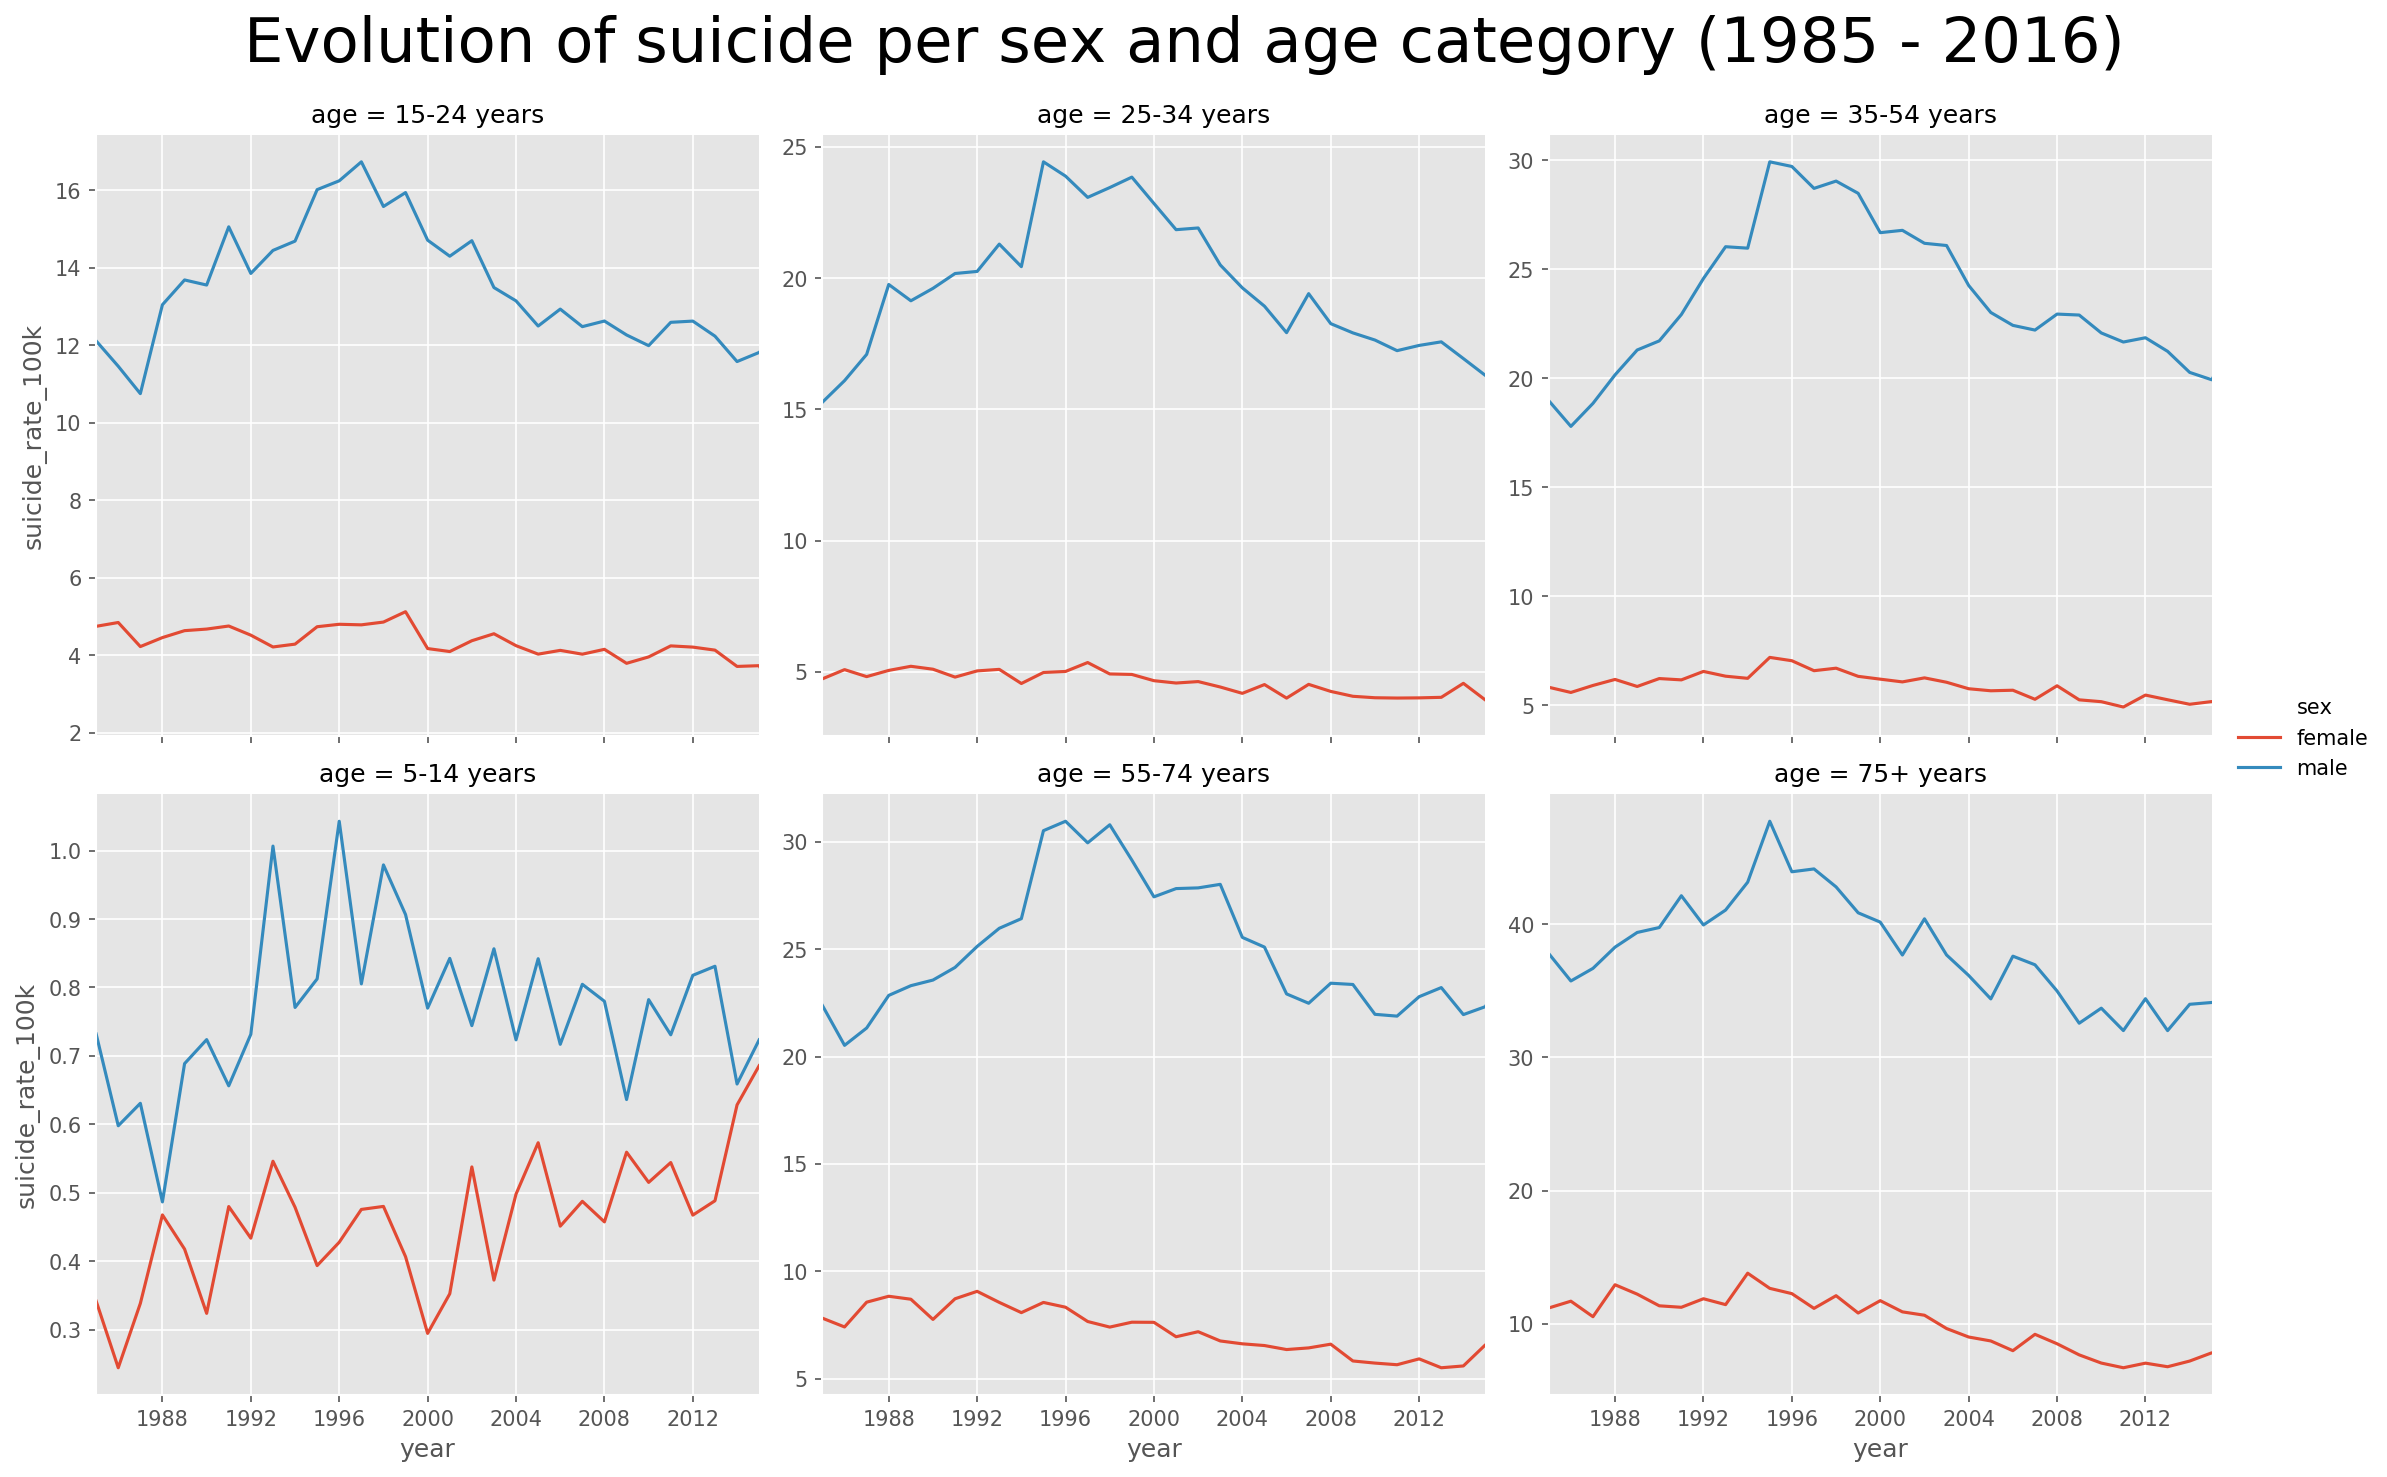

In [420]:
df = data.groupby(["year", "sex", "age"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "suicide_rate_100k", 
            hue = "sex", col = "age", col_wrap = 3, data = df, 
            facet_kws=dict(sharey=False), kind = "line")

plt.xlim("1985", "2015")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide per sex and age category (1985 - 2016)", size = 30);

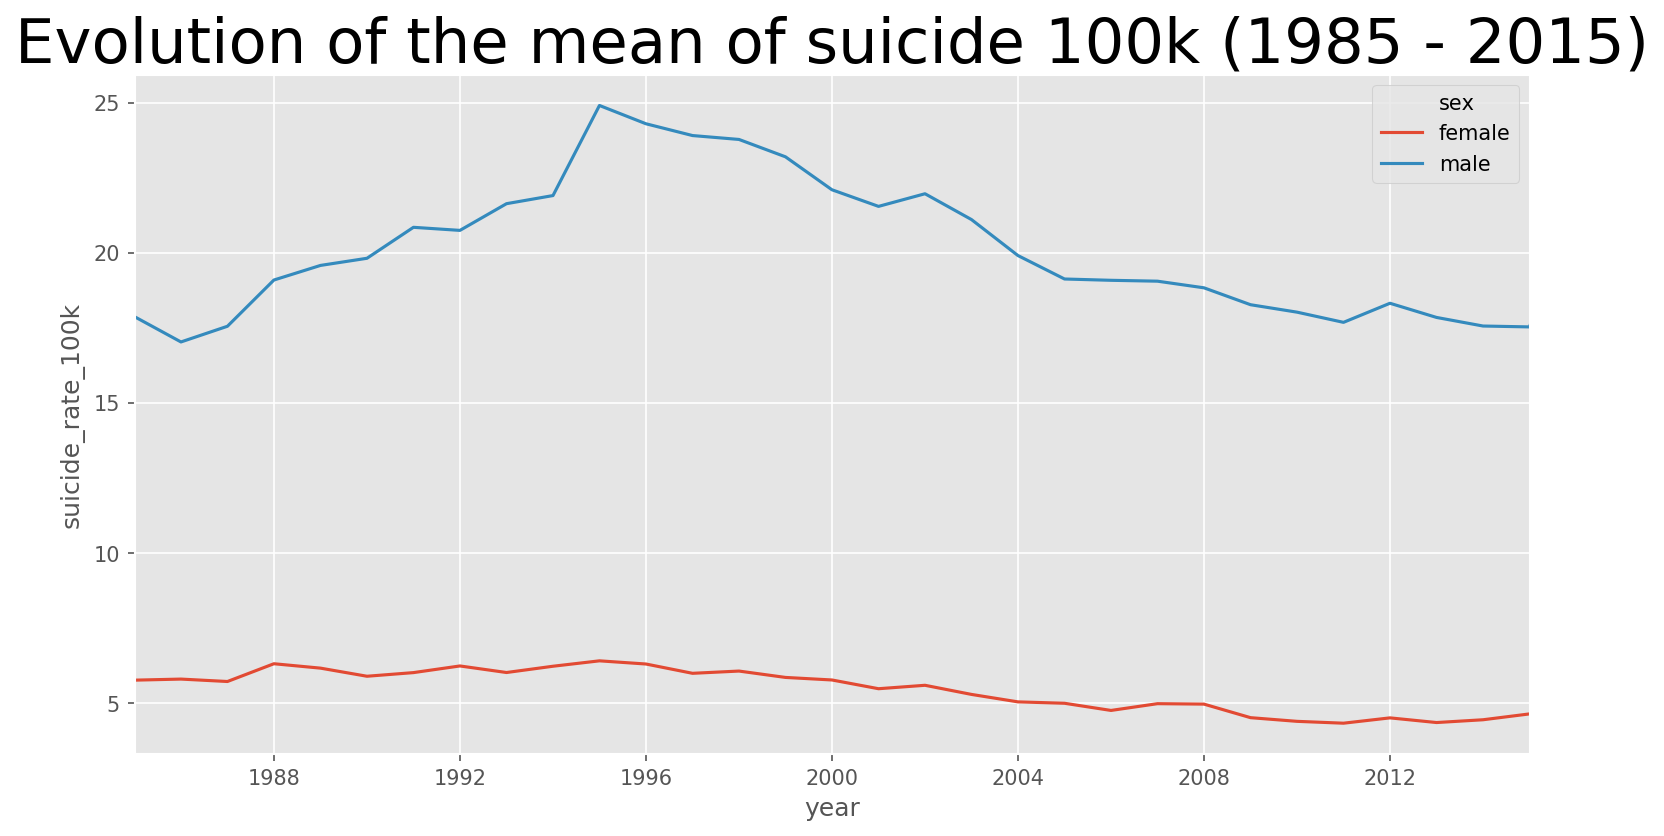

In [421]:
df = data.groupby(["year", "sex"]).agg("mean").reset_index()
sns.lineplot(x = "year", y = "suicide_rate_100k", hue = "sex", data = df)
plt.xlim("1985", "2015")
plt.title("Evolution of the mean of suicide 100k (1985 - 2015)", size = 30);

In [422]:
dm = data.groupby(['country','year'])['suicides_no','population'].sum().reset_index()
dm['suicide_rate'] = dm['suicides_no']*100000/dm['population']
dm = dm[dm['suicides_no'].notnull()]
from sklearn.linear_model import LinearRegression
b = []
for country in dm.country.unique():
    tempdf = dm[dm['country'] == country]
    X = np.asarray(tempdf['year']).reshape([-1,1])
    y = np.asarray(tempdf['suicide_rate']).reshape([-1,1])
    model = LinearRegression()
    results = model.fit(X,y).coef_[0][0]   
    b.append([country,results])

df = pd.DataFrame(b,columns=['country','factor']).sort_values(by='factor')
decrease = list(df['country'].head(10))
increase = list(df['country'].tail(10))

In [423]:
def plot_scatter_links(x:str, y:str, years:list, 
                       agg_fun = "sum", n_col = None):
    
    df = data[data["year"].isin(years)]
    
    df = df.groupby(["year", "country"]).agg(agg_fun).reset_index()
    df["year"] = df["year"].dt.year.astype("object")
    sns.lmplot(x, y, scatter = True, fit_reg= True, 
               data = df, col = "year", col_wrap = n_col, sharex = False, sharey = False)

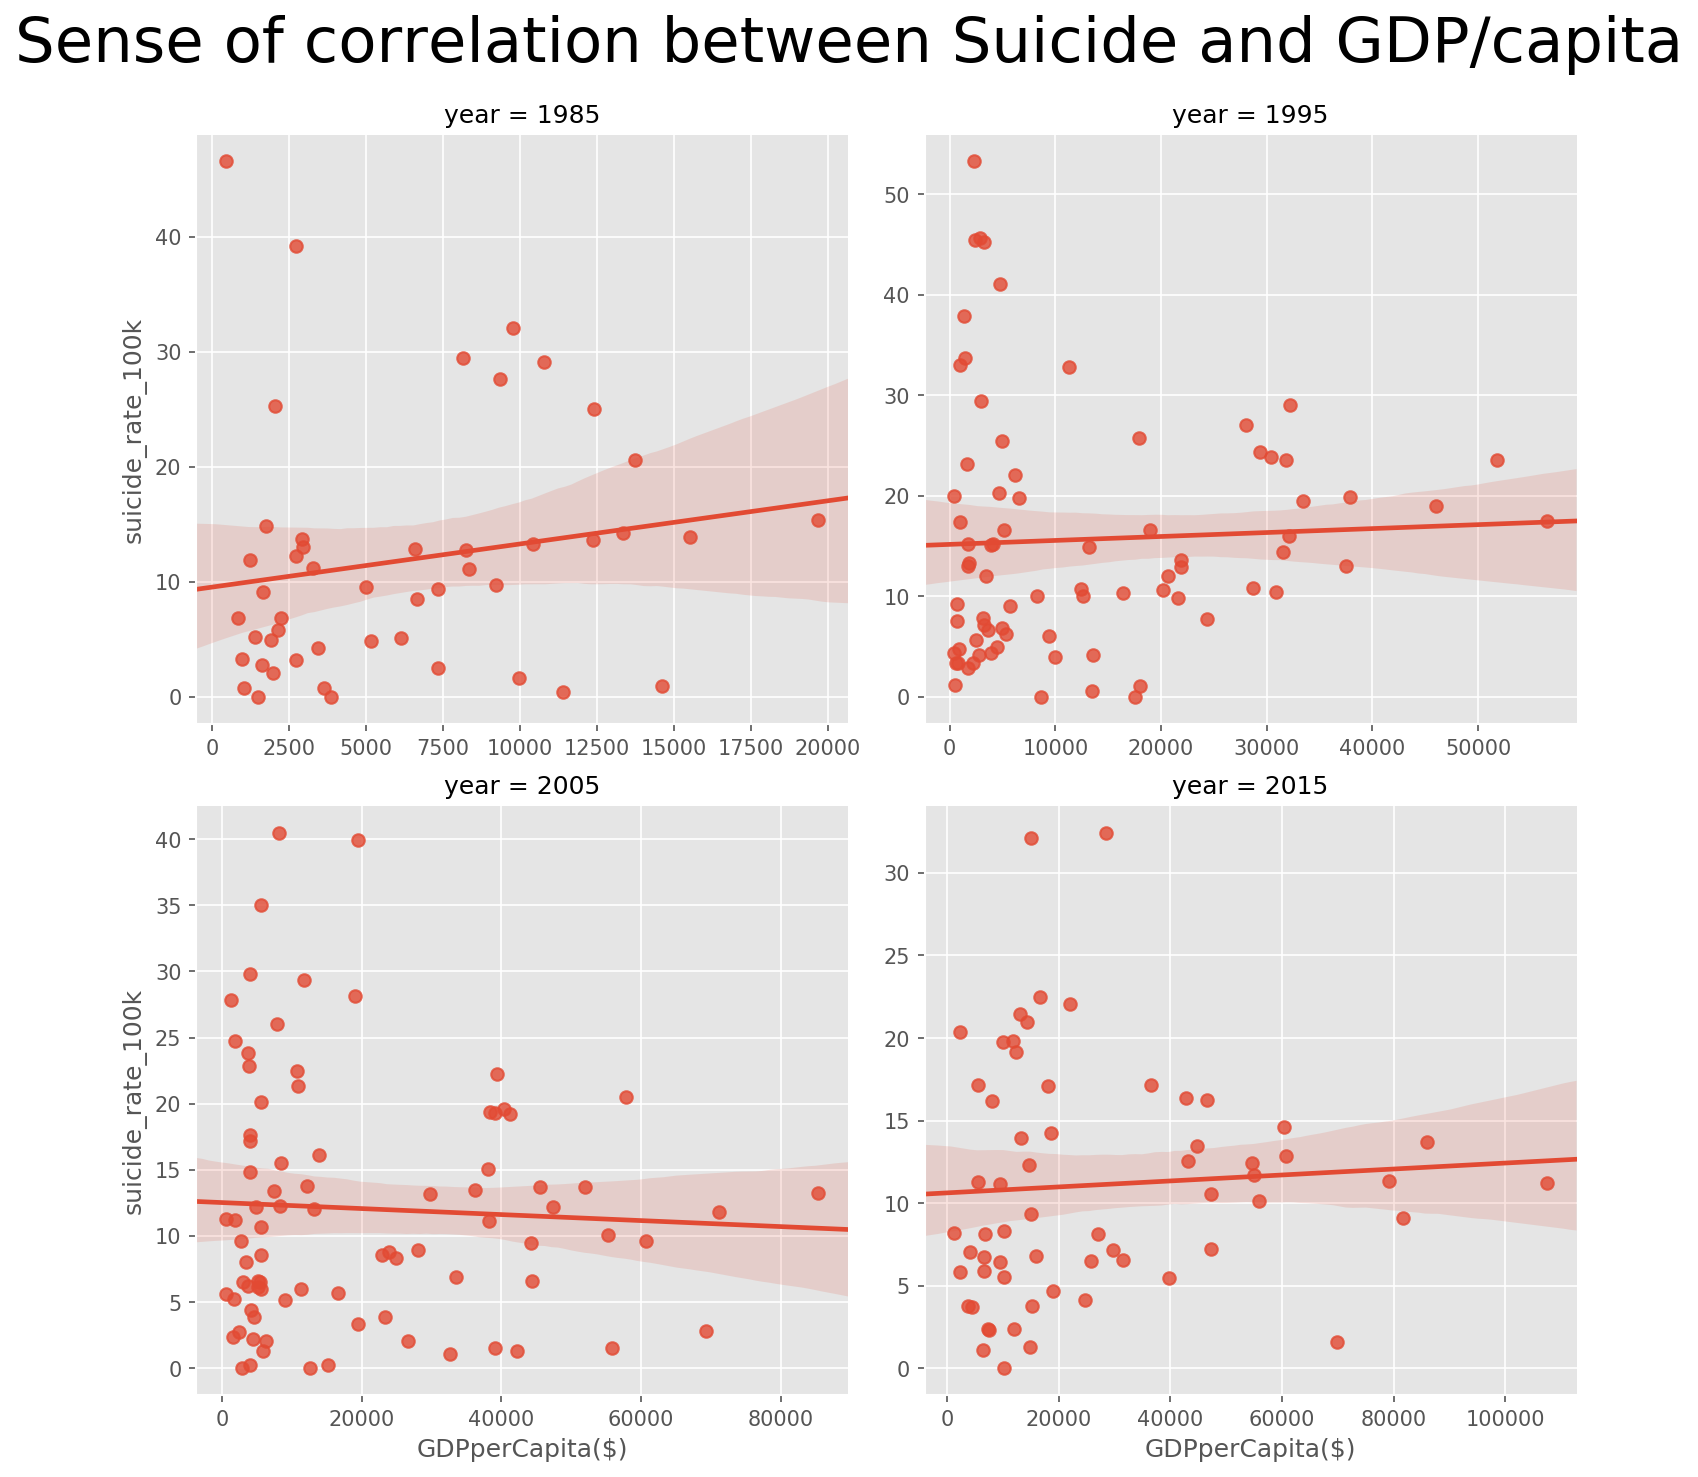

In [424]:
plot_scatter_links(x = "GDPperCapita($)", y = "suicide_rate_100k", 
                   years = ["1985","1995", "2005", "2015"], n_col= 2, agg_fun= "mean")
plt.subplots_adjust(top=.9)
plt.suptitle("Sense of correlation between Suicide and GDP/capita", size = 30);

# Feature Engineering

In [425]:
#exploring the suicides per 100k population variable 
data["suicide_rate_100k"].describe()

count    27820.000000
mean        12.816097
std         18.961511
min          0.000000
25%          0.920000
50%          5.990000
75%         16.620000
max        224.970000
Name: suicide_rate_100k, dtype: float64

Creating a new variable for the suicide rate to help with interpretation

In [426]:
#suicide rate in percentage
data["suicide_rate"] = data["suicides_no"] / data["population"] * 100 
data.sample(5)

,country,year,sex,age,suicides_no,population,suicide_rate_100k,GDPforYear($),GDPperCapita($),generation,suicide_rate
23661,Spain,1996-01-01,male,55-74 years,716,3585800,19.97,640998292395,17166,Silent,0.019968
1913,Austria,1995-01-01,female,35-54 years,136,1065630,12.76,241038283063,32237,Boomers,0.012762
9963,Germany,2011-01-01,male,55-74 years,2538,9396062,27.01,3757698281118,47947,Boomers,0.027011
11885,Iceland,2002-01-01,female,55-74 years,2,21481,9.31,9207689916,34556,Silent,0.009311
8340,El Salvador,2013-01-01,male,5-14 years,6,636699,0.94,21977401900,3885,Generation Z,0.000942


In [427]:
data = data.drop("suicide_rate_100k", axis = 1)

splitting the dataset and exploring the suicide rate (in percentage) created as target variable of the train dataset

In [428]:
#splitting the dataset and exploring them 
train, test = train_test_split(data, train_size = 0.8, test_size=0.2, random_state=0)

In [429]:
#viewing the dataset for the trainset
train.head(5)

,country,year,sex,age,suicides_no,population,GDPforYear($),GDPperCapita($),generation,suicide_rate
24701,Sweden,2014-01-01,female,15-24 years,36,585957,573817719109,62956,Millenials,0.006144
18210,Norway,2014-01-01,female,35-54 years,51,688993,499338534779,103443,Generation X,0.007402
19495,Portugal,1996-01-01,female,35-54 years,32,1341116,122629812841,12887,Boomers,0.002386
3483,Belgium,1988-01-01,male,15-24 years,113,745800,163167853538,17509,Generation X,0.015152
15212,Lithuania,2009-01-01,male,35-54 years,428,440281,37440673478,12412,Boomers,0.097211


In [430]:
#viewing the dataset for the testset
test.head(5)

,country,year,sex,age,suicides_no,population,GDPforYear($),GDPperCapita($),generation,suicide_rate
12885,Italy,1993-01-01,male,55-74 years,1104,5512083,1061445225791,19605,Silent,0.020029
5957,Colombia,2011-01-01,male,5-14 years,41,4163139,335415156702,7885,Generation Z,0.000985
4888,Bulgaria,2013-01-01,female,25-34 years,12,477076,55758754072,8057,Millenials,0.002515
20871,Romania,2011-01-01,female,75+ years,62,884450,184367381749,9086,Silent,0.007010
878,Argentina,2009-01-01,male,55-74 years,434,2683502,332976484578,8961,Silent,0.016173


In [431]:
#saving the suicide rate for the test dataset 
test_y = test["suicide_rate"]

In [432]:
#exploring the suicide_rate variable of the train dataset
train["suicide_rate"].describe()

count    22256.000000
mean         0.012814
std          0.019007
min          0.000000
25%          0.000902
50%          0.005972
75%          0.016504
max          0.204918
Name: suicide_rate, dtype: float64

The average of suicide rate is 0.012% with the minimum rate being 0.0% and 0.22%.
The suicides per 100,000 population is the same as the suicide rate created. therefore it is safe to drop the feature suicides per 100,000. This was converted to help with the interpretation in terms of percentage. 

In [433]:
#saving countries and years for the test dataset 
#countries = test["country"]
#years = test["year"]
#sex = test["sex"]
#age = test["age"]

In [437]:
#finding the relationship between the suicide_rate and other variables in the train dataset
correlation = train.corr()
correlation.sort_values(["suicide_rate"])
correlation.suicide_rate

suicides_no        0.305172
population         0.006590
GDPforYear($)      0.027517
GDPperCapita($)    0.000441
suicide_rate       1.000000
Name: suicide_rate, dtype: float64

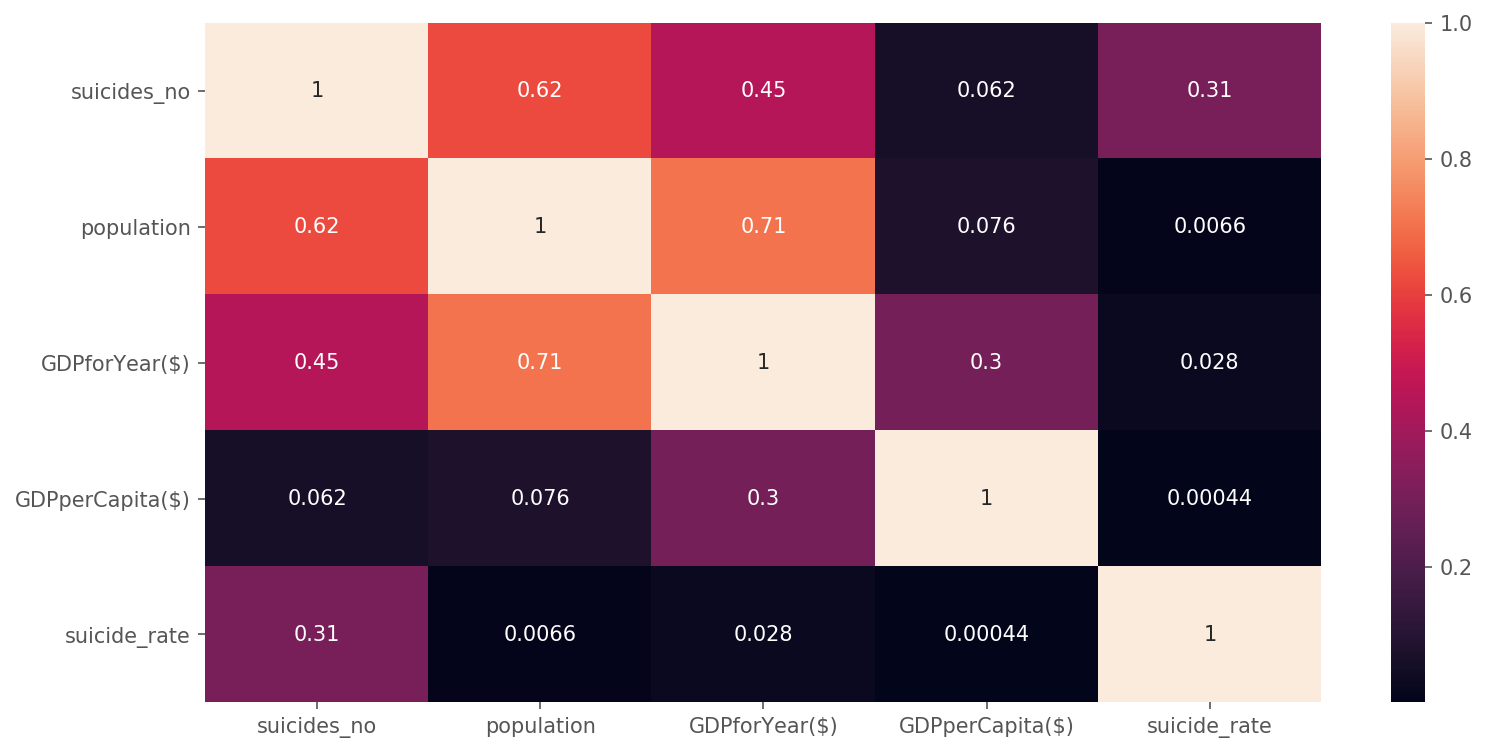

In [438]:
sns.heatmap(correlation, annot = True)

It can be seen that the other variables have a relationship with the variable of interest, that is suicide rates. year is negatively correlated to suicide rate, that as the year increases, there is a negative change in the suicide rates. This change due to a increase in year won't be so significant since the correlation is about -0.039

In [439]:
#finding skewness and kurtosis of the target variable 
from scipy.stats import skew, kurtosis
skew = skew(train["suicide_rate"])
kurt = kurtosis(train["suicide_rate"])
print("skewness:", round(skew, 2))
print("kurtosis:", round(kurt, 2))

skewness: 2.94
kurtosis: 11.7


The dataset is is highly skewed. This is because the skewness is greater than 1, that is, it is positively skewed(skewed to the right). for a normally distributed data, the skewness should be equal to zero. 

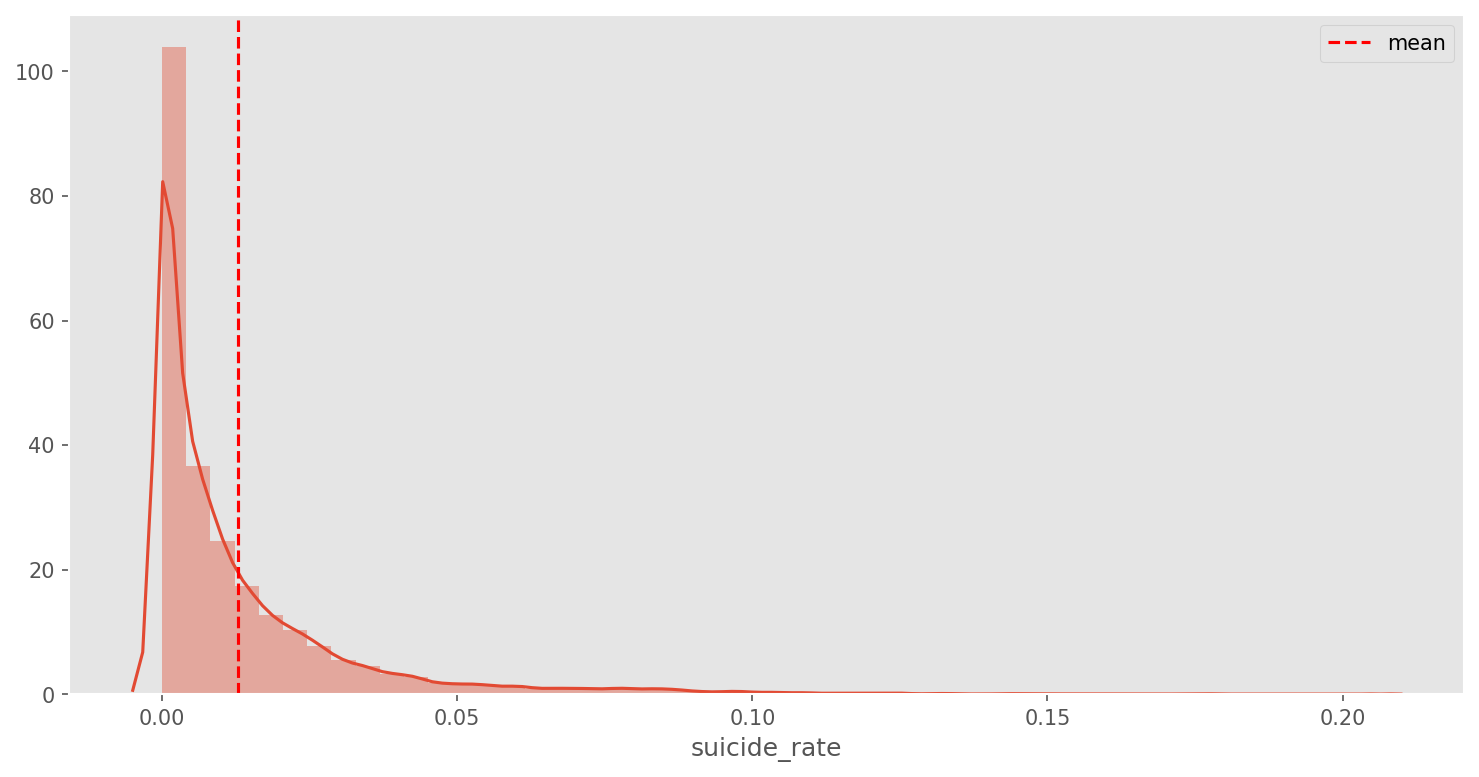

In [440]:
#plotting the target variable to show the distribution of the variable
mean = train["suicide_rate"].describe()['mean']
std = train["suicide_rate"].describe()['std']
#note standard deviation is the deviation of the data from the mean
sns.distplot(train["suicide_rate"], norm_hist = True)
plt.axvline(x = mean, color = "red", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

In order to obtain a normal distribution, the dataset will be transformed by using the boxcox of it. This also deals with the outliers in the data. 

In [441]:
from scipy.special import boxcox
posdata = train[train["suicide_rate"] > 0]
x = posdata['suicide_rate']
posdata['suicide_rate'] = boxcox(x, 0.2)
trans = posdata["suicide_rate"]

## finding skewness and kurtosis of the transformed target variable 
from scipy.stats import skew, kurtosis
skew = skew(trans)
kurt = kurtosis(trans)
print("skewness:", round(skew, 2))
print("kurtosis:", round(kurt, 2))

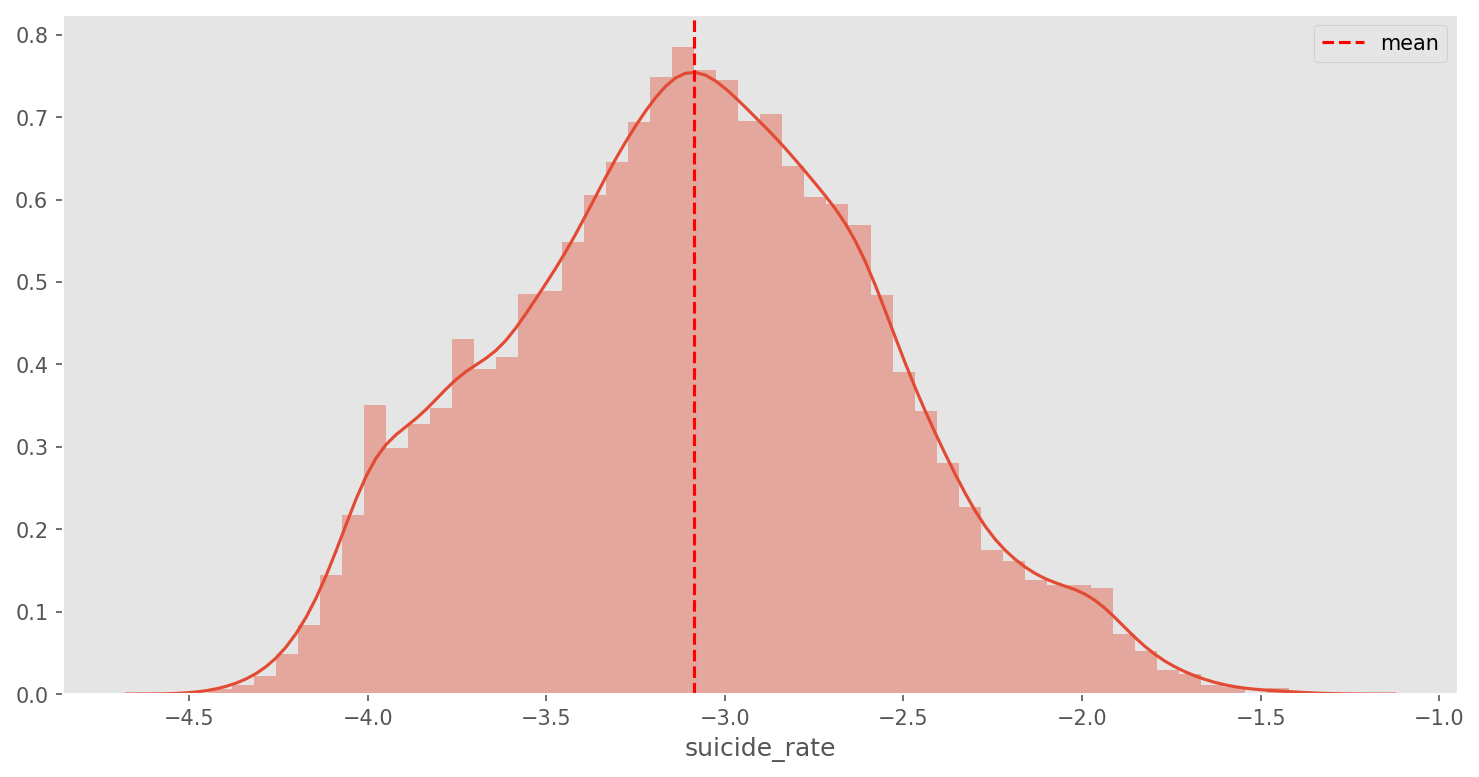

In [442]:
#plotting the target variable 
mean = trans.describe()['mean']
std = trans.describe()['std']
#note standard deviation is the deviation of the data from the mean
sns.distplot(trans, norm_hist = True)
plt.axvline(x = mean, color = "red", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

dropping data values where suicide rate per 100k population is 0.0

In [443]:
print("length of the transformed target variable:", len(trans))
print("Total entry of the dataset:", len(train))

length of the transformed target variable: 18804
Total entry of the dataset: 22256


In [444]:
#dropping entries with 0.0% suicide rates 
train = train.drop(train[(train["suicide_rate"] == 0.0) ].index).reset_index(drop=True)
print("Total entry of the dataset:", len(train))

Total entry of the dataset: 18804


In [445]:
#saving the length of the trainset 
trainset = pd.DataFrame(train)
len_trainset =len(trainset)

concatenate train dataset and test datase. This is to perform the normalizing of highly skewed numerical variables and also to convert categorical or qualitative variables into numerical or quantitative variables of the entire dataset 

In [446]:
data = pd.concat([trainset, test])

In [447]:
#drop suicide rate since it the dependent variable(target variable) t
data = data.drop("suicide_rate", axis = 1)
data.head(5)

,country,year,sex,age,suicides_no,population,GDPforYear($),GDPperCapita($),generation
0,Sweden,2014-01-01,female,15-24 years,36,585957,573817719109,62956,Millenials
1,Norway,2014-01-01,female,35-54 years,51,688993,499338534779,103443,Generation X
2,Portugal,1996-01-01,female,35-54 years,32,1341116,122629812841,12887,Boomers
3,Belgium,1988-01-01,male,15-24 years,113,745800,163167853538,17509,Generation X
4,Lithuania,2009-01-01,male,35-54 years,428,440281,37440673478,12412,Boomers


Normalizing the highly skewed numerical variables in the dataset

In [448]:
numerical_features = data.dtypes[data.dtypes != "object"].index 
skewed_feats = data[numerical_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' :skewed_feats})
skewness

,Skewness
suicides_no,9.734960
GDPforYear($),6.783525
population,4.193918
GDPperCapita($),1.882970


Normalizing numerical(quantitative) variables with skewness greater than 1.

In [449]:
numerical_features = ["suicides_no", "GDPforYear($)", "population", "GDPperCapita($)"]

In [450]:
for i in numerical_features:
    data[i] = np.log1p(data[i])

### Converting categorical data into numerical(quantitative) data

Before setting up the regression model, the categorical data(object) will be transformed into quantitative variables

To do so, there are various methods to encode categorical variables.
- Label encoding
- One-hot encoding
- Binary encoding
- Backwards Difference encoding

For encoding the categorical variables, variables that consist of two or more categrories, the label encoding will be used.

### Label Encoding

In [451]:
from sklearn.preprocessing import LabelEncoder

In [452]:
cols = ("country", "year", "sex", "age", "generation")
for i in cols:
    le = LabelEncoder()
    data[i] = le.fit_transform(list(data[i]))  
data.head()

,country,year,sex,age,suicides_no,population,GDPforYear($),GDPperCapita($),generation
0,89,29,0,0,3.610918,13.281003,27.075578,11.050207,4
1,64,29,0,2,3.951244,13.442988,26.936550,11.546786,2
2,70,11,0,2,3.496508,14.109013,25.532436,9.464052,0
3,12,3,1,0,4.736198,13.522214,25.818045,9.770527,2
4,52,24,1,2,6.061457,12.995171,24.346023,9.426500,0


In [453]:
data.head()

,country,year,sex,age,suicides_no,population,GDPforYear($),GDPperCapita($),generation
0,89,29,0,0,3.610918,13.281003,27.075578,11.050207,4
1,64,29,0,2,3.951244,13.442988,26.936550,11.546786,2
2,70,11,0,2,3.496508,14.109013,25.532436,9.464052,0
3,12,3,1,0,4.736198,13.522214,25.818045,9.770527,2
4,52,24,1,2,6.061457,12.995171,24.346023,9.426500,0


# Fitting the models

In [454]:
train_y = trans 
R = RobustScaler()
R.fit(data)
X = R.transform(data)     #normilaze the dataset to withstand outliers 
train_X = X[:len_trainset]       #dividing the dataset back to trainset and testset 
test_X = X[len_trainset:]

In [455]:
print("length of X:", len(train_X))
print("length of y:", len(train_y))

length of X: 18804
length of y: 18804


In [456]:
#function to calcuate the root mean square error of a model 
def rmse_md(estimator, x, y):
    rmse = np.sqrt(-cross_val_score(estimator, x, y, cv= 15, scoring="neg_mean_squared_error")).mean()
    return rmse  #Root mean square error

The Regression models being implemented are the Random Forest Regression Model, Bayesian Ridge Regression Model, Ridge Regression Model, XGBoost Model, LassoCV Regression Model and the ElasticNetCV Regression Model. The stacking method would later be implement to see how it works to determine the better models to implement  

#### Random Forest Regression Model

In [457]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 120).fit(train_X, train_y)
score = rmse_md(rfr, train_X, train_y)
print("score of Random Forest :",score)
R_squared = rfr.score(train_X, train_y)
print("score of R_squared :", R_squared)

score of Random Forest : 0.016118391219307117
score of R_squared : 0.9998722652297342


#### Bayesian Ridge Regression Model

In [458]:
from sklearn import linear_model
br = linear_model.BayesianRidge()
br.fit(train_X, train_y)
score = rmse_md(br, train_X, train_y)
print("score of Bayesian Ridge :",score)
R_squared = br.score(train_X, train_y)
print("score of R_squared :", R_squared)

score of Bayesian Ridge : 0.08994744751939479
score of R_squared : 0.9706522974782487


#### Ridge Regression Model 

In [459]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(train_X, train_y)
score = rmse_md(rg, train_X, train_y)
print("score of Ridge Regression :", score)
R_squared = rg.score(train_X, train_y)
print("score of R_squared :", R_squared)

score of Ridge Regression : 0.08994801182637507
score of R_squared : 0.9706520475104724


#### XGBOOST Model

In [460]:
import xgboost
xgb = xgboost.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=7200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(train_X, train_y)
score = rmse_md(xgb, train_X, train_y)
print("score of xgb:", score)
R_squared = xgb.score(train_X, train_y)
print("score of R_squared :", R_squared)

score of xgb: 0.039052233120954204
score of R_squared : 0.995751348430518


#### Lasso Regression Model

In [461]:
from sklearn.linear_model import LassoCV
ls = LassoCV(cv = 15)
ls.fit(train_X, train_y)
score = rmse_md(ls, train_X, train_y)
print("score of Lasso Regression :", score)
R_squared = ls.score(train_X, train_y)
print("score of R_squared :", R_squared)

score of Lasso Regression : 0.0899803886489243
score of R_squared : 0.9706311615725988


#### ElasticNet Regression Model

In [462]:
from sklearn.linear_model import ElasticNetCV
en = ElasticNetCV(cv = 15)
en.fit(train_X, train_y)
score = rmse_md(en, train_X, train_y)
print("score of ElasticNet Regression :", score)
R_squared = en.score(train_X, train_y)
print("score of R_squared :", R_squared)

score of ElasticNet Regression : 0.09000254962025801
score of R_squared : 0.9706169279125993


##### Comparing the models  

The best model is the model with the highest $$R^2$$ and least error, that is, the root mean square error. Therefore from the above models, the Random Forest Regression Model gives the highest $$R^2$$ and the least root mean square error. 

Using the Random Forest Regression Model and the test dataset.

In [463]:
from scipy.special import inv_boxcox

In [464]:
#the predicted test target variable 
y_pred_test = inv_boxcox((rfr.predict(test_X)), 0.2)
y_pred_test = pd.DataFrame(y_pred_test)

In [465]:
from sklearn.metrics import r2_score
r2_score(test_y, y_pred_test)   #this is the R_square comparing the predicted y to the true y values

0.7693531155239728

Using the stacking method. Stacking method is used to improve the model to result into a better model for prediction 

In [466]:
from vecstack import stacking

In [467]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [468]:
models = (rfr, br, rg, xgb, ls, en)
S_train, S_test = stacking(models, train_X, train_y , test_X, 
    regression = True, metric = r2_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [RandomForestRegressor]
    fold  0:  [0.99902243]
    fold  1:  [0.99852776]
    fold  2:  [0.99829404]
    fold  3:  [0.99879672]
    ----
    MEAN:     [0.99866024] + [0.00027453]
    FULL:     [0.99865697]

model  1:     [BayesianRidge]
    fold  0:  [0.97024139]
    fold  1:  [0.97006280]
    fold  2:  [0.97117707]
    fold  3:  [0.97093645]
    ----
    MEAN:     [0.97060443] + [0.00046457]
    FULL:     [0.97061274]

model  2:     [Ridge]
    fold  0:  [0.97023481]
    fold  1:  [0.97006576]
    fold  2:  [0.97117580]
    fold  3:  [0.97093965]
    ----
    MEAN:     [0.97060401] + [0.00046519]
    FULL:     [0.97061238]

model  3:     [XGBRegressor]
    fold  0:  [0.99346737]
    fold  1:  [0.99372018]
    fold  2:  [0.99363519]
    fold  3:  [0.99372294]
    ----
    MEAN:     [0.99363642] + [0.00010378]
    FULL:     [0.99363916]

model  4:     [LassoCV]
    fold 

In [469]:
model = rfr
model = model.fit(S_train, train_y)
y_pred = model.predict(S_test)
y_pred = inv_boxcox(y_pred, 0.2)

In [470]:
r2_score(test_y, y_pred)   #this is the R_square comparing the predicted y to the true y values

0.785480527524412

comparing the $$R^2$$ of just using the Random Forest and the stacking model, it can be seen that the stacking slightly peforms better 

In [471]:
prediction = pd.DataFrame()
prediction["suicide_rate"] = y_pred   #using the prediction of the stacking models 

In [472]:
prediction.head(10)

,suicide_rate
0,0.020522
1,0.001000
2,0.002533
3,0.007151
4,0.016236
5,0.001269
6,0.000353
7,0.007253
8,0.033661
9,0.001454
